### <font color='#eeeee'>Задание №1. Загрузите и очистите данные.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import random
import os
import regex
import warnings

#import sklearn
#import tensorflow as tf

pd.options.display.max_columns = 100
pd.options.display.max_rows =  200
pd.options.display.max_info_rows = 1690785
pd.options.display.max_info_columns = 200
pd.options.display.float_format = '{:,.2f}'.format
pd.options.display.date_dayfirst = True

# google colab use
from google.colab import drive, files
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
df = pd.read_csv(file_path, sep=";" )
df = df.drop(df.columns[0], axis=1)
df.columns = [column.lower() for column in df.columns]
df = df.rename({'period_2' : 'date', 'valtoday' : 'value', 'valtoday_usd' : 'value usd'}, axis=1)
df.head(20)

,date,name,updatetime,value,value usd,numtrades
0,2021-January-4,stock,2021-01-04 23:50:27,"251685,508612","3406,87815631","1839593,0"
1,2021-January-4,currency,2021-01-04 23:49:59,"194774,814411","2636,5207288899996","231876,0"
2,2021-January-4,futures,2021-01-04 18:44:59,"485697,13742","6574,51824375","1299640,0"
3,2021-January-4,commodity,2021-01-04 09:30:00,NaN,NaN,NaN
4,2021-January-4,TOTALS,2021-01-04 23:50:27,"932157,460443","12617,917128899999","3371109,0"
5,2021-January-5,stock,2021-01-05 23:50:29,"229687,811864","3109,11181707","1648995,0"
6,2021-January-5,currency,2021-01-05 23:49:59,"235981,95357","3194,3108974899997","169334,0"
7,2021-January-5,futures,2021-01-05 18:44:59,"618686,911758","8374,70117722","1777725,0"
8,2021-January-5,commodity,2021-01-05 09:30:00,NaN,NaN,NaN
9,2021-January-5,TOTALS,2021-01-05 23:50:29,"1084356,67719","14678,1238918","3596054,0"


In [ ]:
#смотрим, если колонка 'Unnamed: 0' точно повторяет индекс
#она повторяла, поэтому была удалена выше
(df[df.columns[0]] == df.index).all()

False

In [ ]:
def groupby_occurences(df, column, values, percent=False):
  '''
  Returns frequency of values (e.g. np.nan) in the DataFrame broken down by target column categories
  '''
  if not hasattr(values, '__iter__') or isinstance(values, str):
    values = [values]

  output = pd.concat([df[column], df.drop(column, axis='columns').isin(values)], axis=1).groupby(column).sum()
  if percent:
    return (output / df.shape[0]).style.format('{:,.2%}')\
      .background_gradient(axis=None)
  else:
    return output.style.background_gradient(axis=None)


groupby_occurences(df, 'name', np.nan)

,date,updatetime,value,value usd,numtrades
name,,,,,
TOTALS,0,0,0,0,0
agro,0,0,8,8,8
commodity,0,0,684,684,684
currency,0,0,4,4,4
futures,0,0,5,5,5
otc,0,0,13,13,13
quotes,0,0,74,74,74
stock,0,0,0,0,0


In [ ]:
#из-за специфики данных можно заменить пропуски нулями

In [ ]:
# remember that replace() produces nan if nothing gets replaced
for column in ['value', 'value usd', 'numtrades']:
  df[column] = df[column].replace('None', 0)
  df[column] = df[column].fillna(0)
  df[column] = df[column].str.replace(',','.').fillna(df[column])
  df[column] = pd.to_numeric(df[column])


df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4218 entries, 0 to 4217
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        4218 non-null   object 
 1   name        4218 non-null   object 
 2   updatetime  4218 non-null   object 
 3   value       4218 non-null   float64
 4   value usd   4218 non-null   float64
 5   numtrades   4218 non-null   float64
dtypes: float64(3), object(3)
memory usage: 197.8+ KB


In [ ]:
df['date'] = pd.to_datetime(df['date'])
df['updatetime'] = pd.to_datetime(df['updatetime'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4218 entries, 0 to 4217
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        4218 non-null   datetime64[ns]
 1   name        4218 non-null   object        
 2   updatetime  4218 non-null   datetime64[ns]
 3   value       4218 non-null   float64       
 4   value usd   4218 non-null   float64       
 5   numtrades   4218 non-null   float64       
dtypes: datetime64[ns](2), float64(3), object(1)
memory usage: 197.8+ KB


In [ ]:
df

,date,name,updatetime,value,value usd,numtrades
0,2021-01-04,stock,2021-01-04 23:50:27,"251,685.51","3,406.88","1,839,593.00"
1,2021-01-04,currency,2021-01-04 23:49:59,"194,774.81","2,636.52","231,876.00"
2,2021-01-04,futures,2021-01-04 18:44:59,"485,697.14","6,574.52","1,299,640.00"
3,2021-01-04,commodity,2021-01-04 09:30:00,0.00,0.00,0.00
4,2021-01-04,TOTALS,2021-01-04 23:50:27,"932,157.46","12,617.92","3,371,109.00"
...,...,...,...,...,...,...
4213,2023-09-15,commodity,2023-09-15 07:00:00,0.00,0.00,0.00
4214,2023-09-15,agro,2023-09-15 13:56:36,208.35,2.17,26.00
4215,2023-09-15,otc,2023-09-15 23:49:50,"8,862.40",92.16,601.00
4216,2023-09-15,quotes,2023-09-15 23:49:59,0.00,0.00,0.00


### <font color='#eeeee'>Задание №2: Проанализируйте данные, представленные в датасете. Ответьте на вопросы:

- Какие сегменты биржевого рынка представлены в датасете?
- Какой среднедневной объем торгов по всем рынкам и на каждом из рынков?
- Какой месяц, день недели наиболее активные с точки зрения объемов торгов и количества операций участников?   

In [ ]:
#сегменты рынка
#TOTALS - весь рынок
df['name'].unique()

array(['stock', 'currency', 'futures', 'commodity', 'TOTALS', 'otc',
       'agro', 'quotes'], dtype=object)

In [ ]:
#среднедневной объем торгов по рынкам
df.groupby('name')[['value', 'value usd', 'numtrades']].mean().sort_values('value', ascending=False)

,value,value usd,numtrades
name,,,
TOTALS,"3,706,490.54","50,021.39","4,333,825.65"
stock,"2,173,741.11","29,380.60","2,578,311.04"
currency,"1,122,283.14","15,059.62","399,877.25"
futures,"408,658.74","5,557.54","1,355,590.03"
otc,"3,245.20",42.02,67.19
agro,297.15,4.40,29.49
commodity,0.57,0.01,0.01
quotes,0.00,0.00,0.00


In [ ]:
df['weekday'] = df['date'].dt.day_name()
df['month'] = df['date'].dt.month_name()
df[['weekday', 'month']]

,weekday,month
0,Monday,January
1,Monday,January
2,Monday,January
3,Monday,January
4,Monday,January
...,...,...
4213,Friday,September
4214,Friday,September
4215,Friday,September
4216,Friday,September


In [ ]:
import itertools

#делать так для настолько малого количества комбинаций не стоит,
#это вставлено для примера на случай, если переменных будет намного больше
categories = ['weekday', 'month']
criteria = ['value', 'numtrades']

for category, criteria in itertools.product(categories, criteria):
  idmax = df.groupby(category)[criteria].mean().idxmax()
  print(f'the most active {category} based on {criteria}: {idmax}')

the most active weekday based on value: Tuesday
the most active weekday based on numtrades: Tuesday
the most active month based on value: March
the most active month based on numtrades: February


In [ ]:
#альтернативный способ ответа на вопрос о максимально активном дне/месяце
df.groupby('weekday')[['value', 'value usd', 'numtrades']].mean().sort_values('value', ascending=False).style.format(precision=0, thousands=' ')

,value,value usd,numtrades
weekday,,,
Tuesday,1 328 316,17 848,1 473 105
Wednesday,1 251 837,16 911,1 410 808
Thursday,1 203 545,16 254,1 452 759
Monday,1 199 953,16 290,1 462 865
Friday,1 176 346,15 831,1 401 596
Saturday,80 583,1 089,140 152


### <font color='#eeeee'>Задание №3-4: Проведите анализ данных, представленных в датасете. Ответьте на вопросы:
    
- Какой сегмент биржевого рынка является основным исходя из имеющихся данных и почему?
- Охарактеризуйте и количественно опишите активность участников рынка. На каком рынке участники показывают наибольшую активность?
- Какие тенденции вы видите исходя из имеющихся данных?

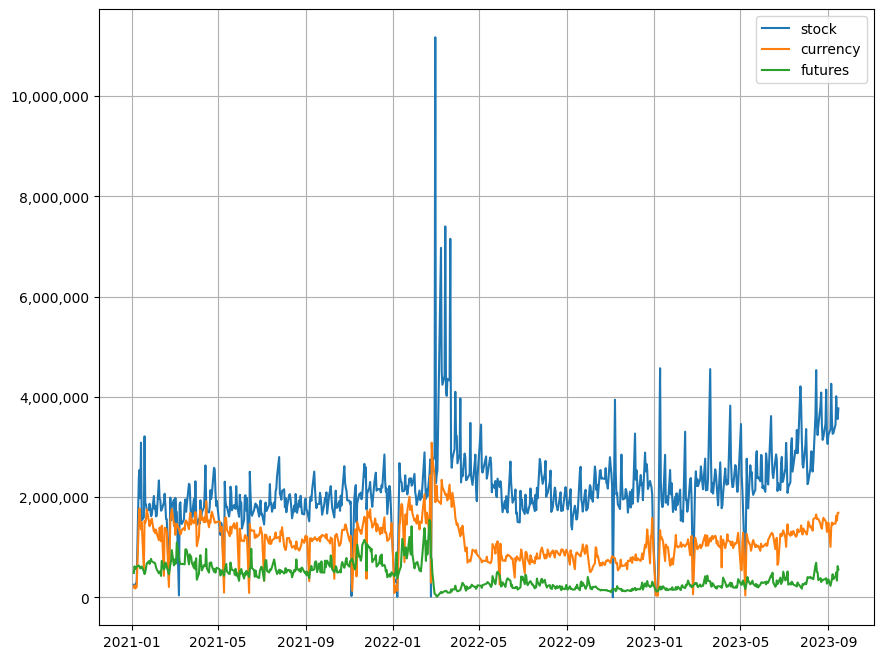

In [ ]:
fig = plt.figure(figsize=(10, 8))
ax = fig.subplots()

out = df[~df['name'].isin(['TOTALS', 'quotes', 'otc', 'commodity', 'agro'])].set_index('date')

out = out[out['value'] > 1]
out = out[out['weekday'] != 'Saturday']


for exchange_type in out['name'].unique():
  ax.plot(out[out['name'] == exchange_type]['value'], label=exchange_type)

ax.get_yaxis().set_major_formatter(matplotlib.ticker.StrMethodFormatter('{x:,.0f}'))

plt.grid()
plt.legend()
plt.show()

Рынок акций является самым активным исходя из графика.  
Мы видим резкое изменение поведения участников рынка в связи с началом СВО -
примечательно, виден всплеск торговлей акциями и небольшой рост торговли валютой
торговля фьючерсами, однако, не претерпевала резкого роста, и упала до нуля с началом СВО.  
После шокового периода торговля акциями возобновилась в практически том же обьеме, а вот обьем торговли и валютой, и фьючерсами стал торговаться на гораздо более низком уровне.  
Спустя более полутора лет, обьем торговли валютой и фьючерсами так и не вернулся на прежний уровень

### <font color='#eeeee'>Задание №5: Загрузите датасет об итогам торгов по валютным парам ("Curr_trading_results.csv") из директории lesson_notebook_data и проведите беглый осмотр данных. Если необходимо:
1) Преобразуйте данные
2) Обогатите данные дополнительными признаками


<br><i>**Документация** по отдельным полям:
- NAME - Наименование валютной пары и режима торгов
- CountTrades(K) - Количество сделок, тыс. шт
- OpenPrice, LowPrice, HighPrice, ClosePrice - Цен открытия, минимальная, максимальная, цены закрытия, руб
- WAPrice - Средневзвешенная цена, руб
- VOLUMERUB - Объем торгов, руб.
  </i>
    

In [ ]:
df = pd.read_csv(file_path, sep=';')
df

,Unnamed: 0,Year,Month,Day,Name,CountTrades(K),OpenPrice,LowPrice,HighPrice,ClosePrice,WAPrice,VOLUMERUB
0,0,Год: 2021,Месяц: 1,День: 4,Юань-российский рубль__CETS,0.34,"11,466","11,328","11,512","11,502","11,4212","331,910,533.00"
1,3,Год: 2021,Месяц: 1,День: 5,Юань-российский рубль__CETS,0.36,"11,5365","11,47","11,6639","11,51","11,5797","307,417,630.00"
2,6,Год: 2021,Месяц: 1,День: 6,Юань-российский рубль__CETS,0.29,"11,4456","11,41","11,5004","11,464","11,4478","339,049,190.10"
3,1,Год: 2021,Месяц: 1,День: 4,Доллар США-российский рубль__CETS,65.84,"74,135","73,055","74,405","74,33","73,657","161,794,021,855.00"
4,5,Год: 2021,Месяц: 1,День: 5,Доллар США-российский рубль__CETS,65.55,"74,1125","73,85","75,2875","74,04","74,6358","201,242,708,062.50"
...,...,...,...,...,...,...,...,...,...,...,...,...
2305,6,Год: 2022,Месяц: 12,День: 26,Юань-российский рубль__CETS,60.20,"9,989","9,656","10,049","9,774","9,7463","96,258,423,429.00"
2306,9,Год: 2022,Месяц: 12,День: 27,Юань-российский рубль__CETS,78.14,"9,802","9,703","10,117","9,98","9,9507","132,393,542,822.00"
2307,3,Год: 2022,Месяц: 12,День: 28,Юань-российский рубль__CETS,59.98,"10,017","9,993","10,249","10,249","10,1594","112,652,796,757.00"
2308,6,Год: 2022,Месяц: 12,День: 29,Юань-российский рубль__CETS,78.62,"10,266","10,005","10,326","10,186","10,1399","149,423,285,640.00"


In [ ]:
df = df.drop(df.columns[0], axis=1)
df = df.rename({'VOLUMERUB' : 'VolumeRub', 'Name' : 'name'}, axis=1)
df['name'] = df['name'].str.replace('__CETS', '')

df['Year'] = df['Year'].str.strip('Год: ')
df['Month'] = df['Month'].str.strip('Месяц: ')
df['Day'] = df['Day'].str.strip('День: ')
df['date'] = (df['Year'] + '.' + df['Month'] + '.' + df['Day'])
df['date'] = pd.to_datetime(df['date'])
df = df.drop(['Day', 'Month', 'Year'], axis=1)

df['trades'] = (df['CountTrades(K)'] * 1000).astype('int')
df = df.drop('CountTrades(K)', axis=1)

columns = ['OpenPrice',	'LowPrice', 'HighPrice',	'ClosePrice',	'WAPrice']
for column in columns:
  df[column] = df[column].str.replace(',', '.')
  df[column] = pd.to_numeric(df[column], errors='raise')

df

,name,OpenPrice,LowPrice,HighPrice,ClosePrice,WAPrice,VolumeRub,date,trades
0,Юань-российский рубль,11.47,11.33,11.51,11.50,11.42,"331,910,533.00",2021-01-04,335
1,Юань-российский рубль,11.54,11.47,11.66,11.51,11.58,"307,417,630.00",2021-01-05,358
2,Юань-российский рубль,11.45,11.41,11.50,11.46,11.45,"339,049,190.10",2021-01-06,286
3,Доллар США-российский рубль,74.14,73.06,74.41,74.33,73.66,"161,794,021,855.00",2021-01-04,65837
4,Доллар США-российский рубль,74.11,73.85,75.29,74.04,74.64,"201,242,708,062.50",2021-01-05,65551
...,...,...,...,...,...,...,...,...,...
2305,Юань-российский рубль,9.99,9.66,10.05,9.77,9.75,"96,258,423,429.00",2022-12-26,60202
2306,Юань-российский рубль,9.80,9.70,10.12,9.98,9.95,"132,393,542,822.00",2022-12-27,78135
2307,Юань-российский рубль,10.02,9.99,10.25,10.25,10.16,"112,652,796,757.00",2022-12-28,59982
2308,Юань-российский рубль,10.27,10.01,10.33,10.19,10.14,"149,423,285,640.00",2022-12-29,78621


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2310 entries, 0 to 2309
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   name        2310 non-null   object        
 1   OpenPrice   2310 non-null   float64       
 2   LowPrice    2310 non-null   float64       
 3   HighPrice   2310 non-null   float64       
 4   ClosePrice  2310 non-null   float64       
 5   WAPrice     2310 non-null   float64       
 6   VolumeRub   2310 non-null   float64       
 7   date        2310 non-null   datetime64[ns]
 8   trades      2310 non-null   int64         
dtypes: datetime64[ns](1), float64(6), int64(1), object(1)
memory usage: 162.5+ KB


### <font color='#eeeee'>Задание №6: Проанализируйте данные, представленные в датасете. Ответьте на вопросы:

- Какие валютные пары представлены в датасете и за какой временной период?
- Назовите рекодный по количеству, объему сделок день для каждой валютной пары?
- Какие дни недели являются самыми активными (по количеству сделок) для каждой валютной пары?
- Постройте корреляционную матрицу, используя средневзвешенную цену, объем торгов и количество сделок.

In [ ]:
#валютные пары
df['name'].unique()

array(['Юань-российский рубль', 'Доллар США-российский рубль',
       'Евро-российский рубль'], dtype=object)

In [ ]:
#рекодный по количеству, объему сделок день для каждой валютной пары
df.iloc[df.groupby('name')['trades'].idxmax()]

,name,OpenPrice,LowPrice,HighPrice,ClosePrice,WAPrice,VolumeRub,date,trades
878,Доллар США-российский рубль,82.95,82.50,89.60,85.25,85.08,"760,312,767,555.00",2022-02-24,235933
1055,Евро-российский рубль,62.38,58.27,63.48,60.10,60.07,"149,602,004,390.00",2022-05-23,74894
1303,Юань-российский рубль,8.30,7.94,8.40,8.09,8.14,"106,801,356,428.00",2022-09-23,121105


In [ ]:
df['weekday'] = df['date'].dt.day_name()

In [ ]:
#самые активные (по количеству сделок) дни недели для каждой валютной пары
df.loc[df.groupby('weekday')['trades'].idxmax(), ['weekday', 'date', 'trades']].sort_values('trades', ascending=False).style\
.hide(axis='index')\
.format({'date' : '{:%Y.%m.%d}', 'trades' : '{:,.0f}'})

weekday,date,trades
Thursday,2022.02.24,"235,933"
Monday,2022.02.21,"205,757"
Tuesday,2022.02.22,"173,815"
Friday,2022.02.25,"134,416"
Wednesday,2022.05.25,"112,356"
Saturday,2021.02.20,"16,963"


<Axes: >

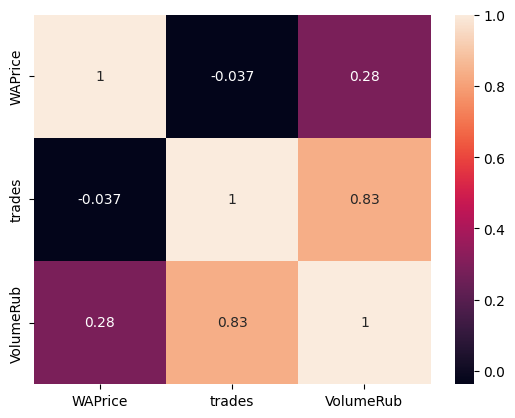

In [ ]:
#корреляционная матрица
sns.heatmap(df[['WAPrice', 'trades', 'VolumeRub']].corr(), annot=True)

### <font color='#eeeee'>Задание №7: Изучите общие тенденции, ответьте на вопросы и визуализируйте данные:

- Рассчитайте и визуализируйте помесячный среднедневной объем торгов для каждой из валютных пар.
- Какая валютная пара была лидером по среднедневному объему торгов **в августе 2022 года**?
- Выделите периоды, когда изменение цен носило аномальный характер.

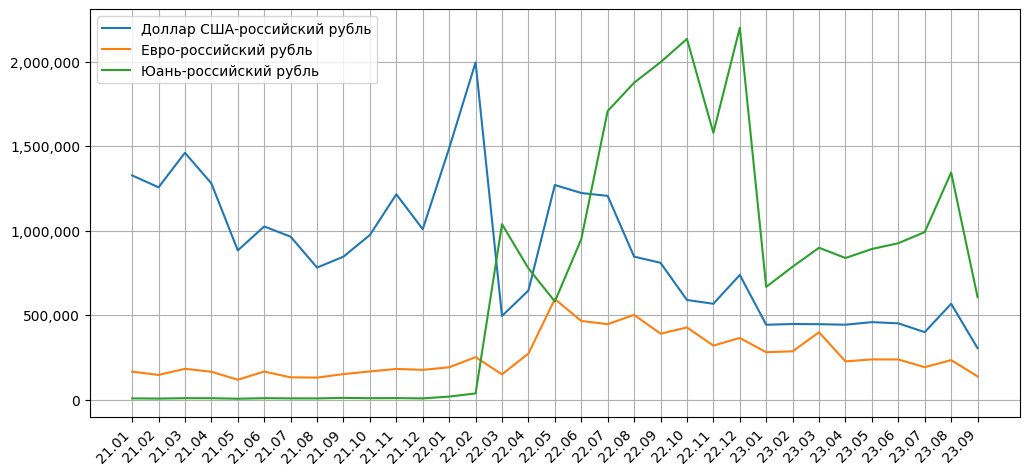

In [ ]:
#помесячный среднедневной объем торгов
fig = plt.figure(figsize=(12, 6))
ax = fig.subplots()

out = df.copy()
out['date'] = out['date'].dt.strftime('%y.%m')
out = out.groupby(['date', 'name'])['trades'].sum().reset_index(1)

for unique in out['name'].unique():
  ax.plot(out[out['name'] == unique]['trades'], label=unique)

ax.yaxis.set_major_formatter(matplotlib.ticker.StrMethodFormatter('{x:,.0f}'))
fig.autofmt_xdate(rotation=45)

plt.grid()
plt.legend()
plt.show()

Аномальный период для всех валютных пар - с февраля по май 22. Также, для пары юань-рубль аномальным периодом является декабрь 22 - январь 23.

In [ ]:
#лидер торгов
df[(df['date'] >= '08.01.2022') & (df['date'] < '09.01.2022')].groupby('name')['trades'].mean()

name
Доллар США-российский рубль   36,805.43
Евро-российский рубль         21,824.26
Юань-российский рубль         40,764.87
Name: trades, dtype: float64

### <font color='#eeeee'>Задание №8: Проанализируйте данные, представленные в датасете. Ответьте на вопросы:
    

- Какая валюта оказалась наиболее выигрышной с точки зрения инвестиций за весь период? Подкрепите заключение соотв. графиком
- Какая валютная пара является наиболее волатильной?
-  Можно ли проанализировать тенденции, не связанные с курсом рубля? Как это можно реализовать?
- Постройте тепловую карту внутредневных приростов цен (для этого рассчитайте изменения средневзвешенных цен по сравнению с предыдущим днем для каждой валютной пары)

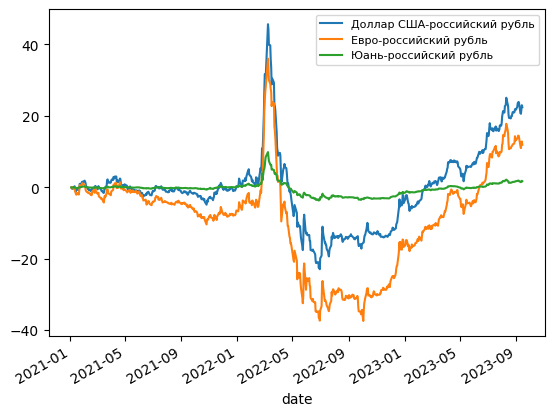

In [ ]:
#графики валютных пар с базовыми ценами, посчитанные относительно 1ого периода
#наглядно видно, что доллар был наиболее выигрышной валютой
out = df.copy(deep=True)

for unique in out['name'].unique():
  out.loc[out['name'] == unique, 'ClosePrice adj'] = out['ClosePrice'] - out[out['name'] == unique].iloc[0]['ClosePrice']


out.set_index('date').groupby('name')['ClosePrice adj'].plot()
plt.legend(prop={'size': 8});

In [ ]:
#волатильность валют
df.groupby('name')['ClosePrice'].std()

name
Доллар США-российский рубль   10.77
Евро-российский рубль         13.79
Юань-российский рубль          2.05
Name: ClosePrice, dtype: float64

Мы можем, при желании, проанализировать тенденции между тремя валютами, кроме рубля. Например, чтобы посмотреть на курс `Доллар США-Евро`, нужно курс `Доллар США-российский рубль` разделить на курс `Евро-российский рубль`.

In [ ]:
df['change'] = df.groupby('name')['WAPrice'].diff()
df['change']

0        NaN
1       0.16
2      -0.13
3        NaN
4       0.98
        ... 
2305   -0.03
2306    0.20
2307    0.21
2308   -0.02
2309   -0.23
Name: change, Length: 2310, dtype: float64

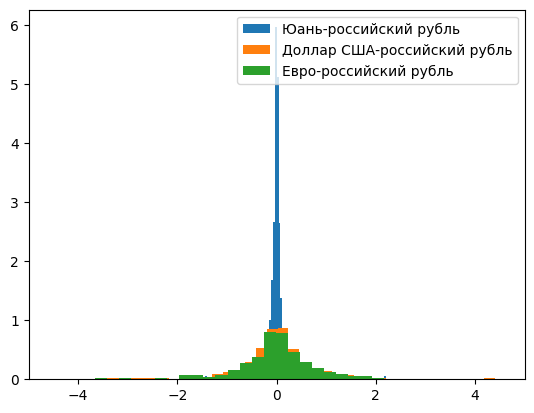

In [ ]:
#тепловая карта приростов цен
fig, ax = plt.subplots()

for name in df['name'].unique():
  plt.hist(df[df['name'] == name]['change'], label=name, bins=100, density=True)

plt.xlim(-5, 5)
plt.legend();